In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy, zscore
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
cols = data.columns
cols = cols.drop(['Time', 'Class'])

In [ ]:
def calculate_stats_num(df, cols):
    """Oblicza statystyki dla kolumn numerycznych w DataFrame."""

    stats_df = pd.DataFrame(index=cols)

    stats_df['Mean'] = df[cols].mean()
    stats_df['Median'] = df[cols].median()
    stats_df['StdDev'] = df[cols].std()
    stats_df['Variance'] = df[cols].var()
    stats_df['CV'] = stats_df['StdDev'] / stats_df['Mean']  # Współczynnik zmienności
    stats_df['Skewness'] = df[cols].skew() #Skośność
    stats_df['Kurtosis'] = df[cols].kurtosis() #Kurtoza
    stats_df['Min'] = df[cols].min()
    stats_df['Q1'] = df[cols].quantile(0.25)  # Pierwszy kwartyl
    stats_df['Q2'] = df[cols].quantile(0.50)  # Drugi kwartyl (mediana)
    stats_df['Q3'] = df[cols].quantile(0.75)  # Trzeci kwartyl
    stats_df['Max'] = df[cols].max()
    stats_df['IQR'] = stats_df['Q3'] - stats_df['Q1'] #Rozstęp międzykwartylowy
    return stats_df
describe_num_cols = calculate_stats_num(data, cols)
describe_num_cols

,Mean,Median,StdDev,Variance,CV,Skewness,Kurtosis,Min,Q1,Q2,Q3,Max,IQR
V1,1.175161e-15,0.018109,1.958696,3.836489,1.666747e+15,-3.280667,32.486679,-56.407510,-0.920373,0.018109,1.315642,2.454930,2.236015
V2,3.384974e-16,0.065486,1.651309,2.726820,4.878349e+15,-4.624866,95.773106,-72.715728,-0.598550,0.065486,0.803724,22.057729,1.402274
V3,-1.379537e-15,0.179846,1.516255,2.299029,-1.099105e+15,-2.240155,26.619551,-48.325589,-0.890365,0.179846,1.027196,9.382558,1.917560
V4,2.094852e-15,-0.019847,1.415869,2.004684,6.758800e+14,0.676292,2.635455,-5.683171,-0.848640,-0.019847,0.743341,16.875344,1.591981
V5,1.021879e-15,-0.054336,1.380247,1.905081,1.350695e+15,-2.425901,206.904560,-113.743307,-0.691597,-0.054336,0.611926,34.801666,1.303524
V6,1.494498e-15,-0.274187,1.332271,1.774946,8.914505e+14,1.826581,42.642494,-26.160506,-0.768296,-0.274187,0.398565,73.301626,1.166861
V7,-5.620335e-16,0.040103,1.237094,1.530401,-2.201103e+15,2.553907,405.607417,-43.557242,-0.554076,0.040103,0.570436,120.589494,1.124512
V8,1.149614e-16,0.022358,1.194353,1.426479,1.038917e+16,-8.521944,220.586974,-73.216718,-0.208630,0.022358,0.327346,20.007208,0.535976
V9,-2.414189e-15,-0.051429,1.098632,1.206992,-4.550729e+14,0.554680,3.731311,-13.434066,-0.643098,-0.051429,0.597139,15.594995,1.240237
V10,2.238554e-15,-0.092917,1.088850,1.185594,4.864077e+14,1.187141,31.988239,-24.588262,-0.535426,-0.092917,0.453923,23.745136,0.989349


--- Wizualizacje dla zmiennych numerycznych (separate subplots) ---


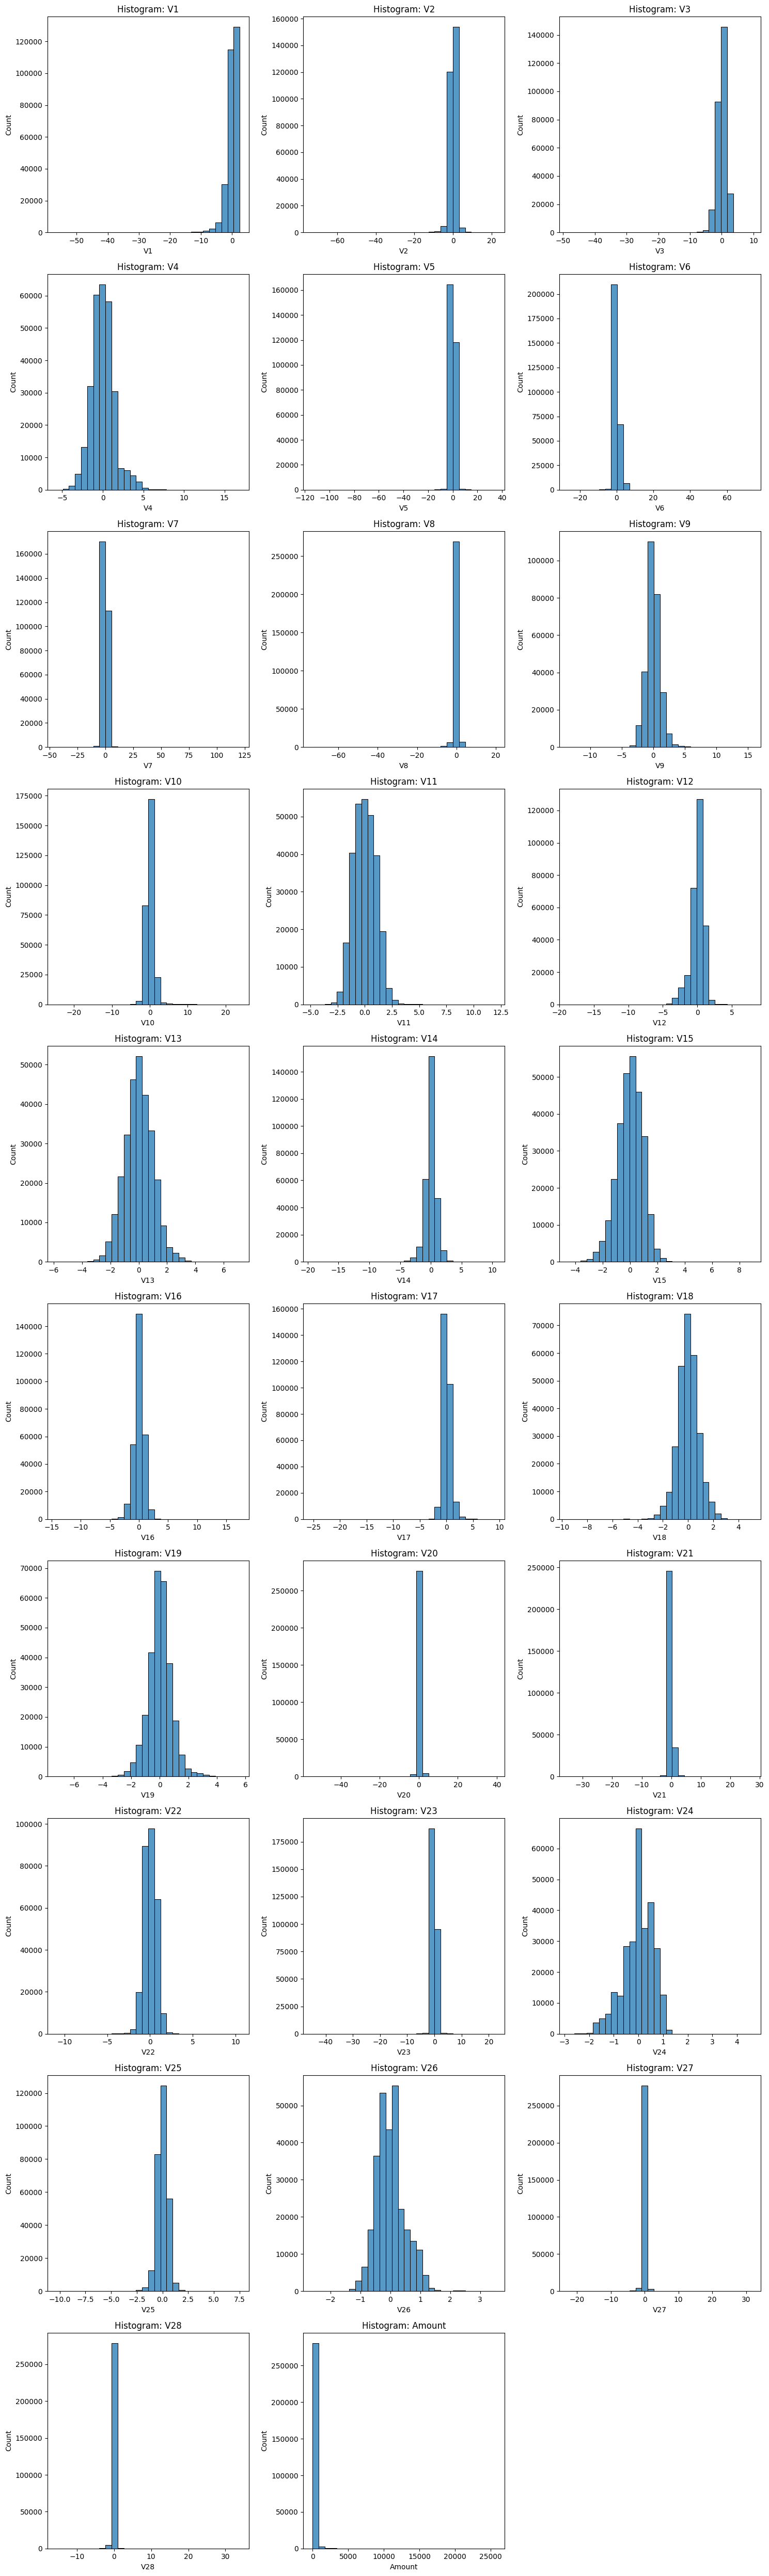

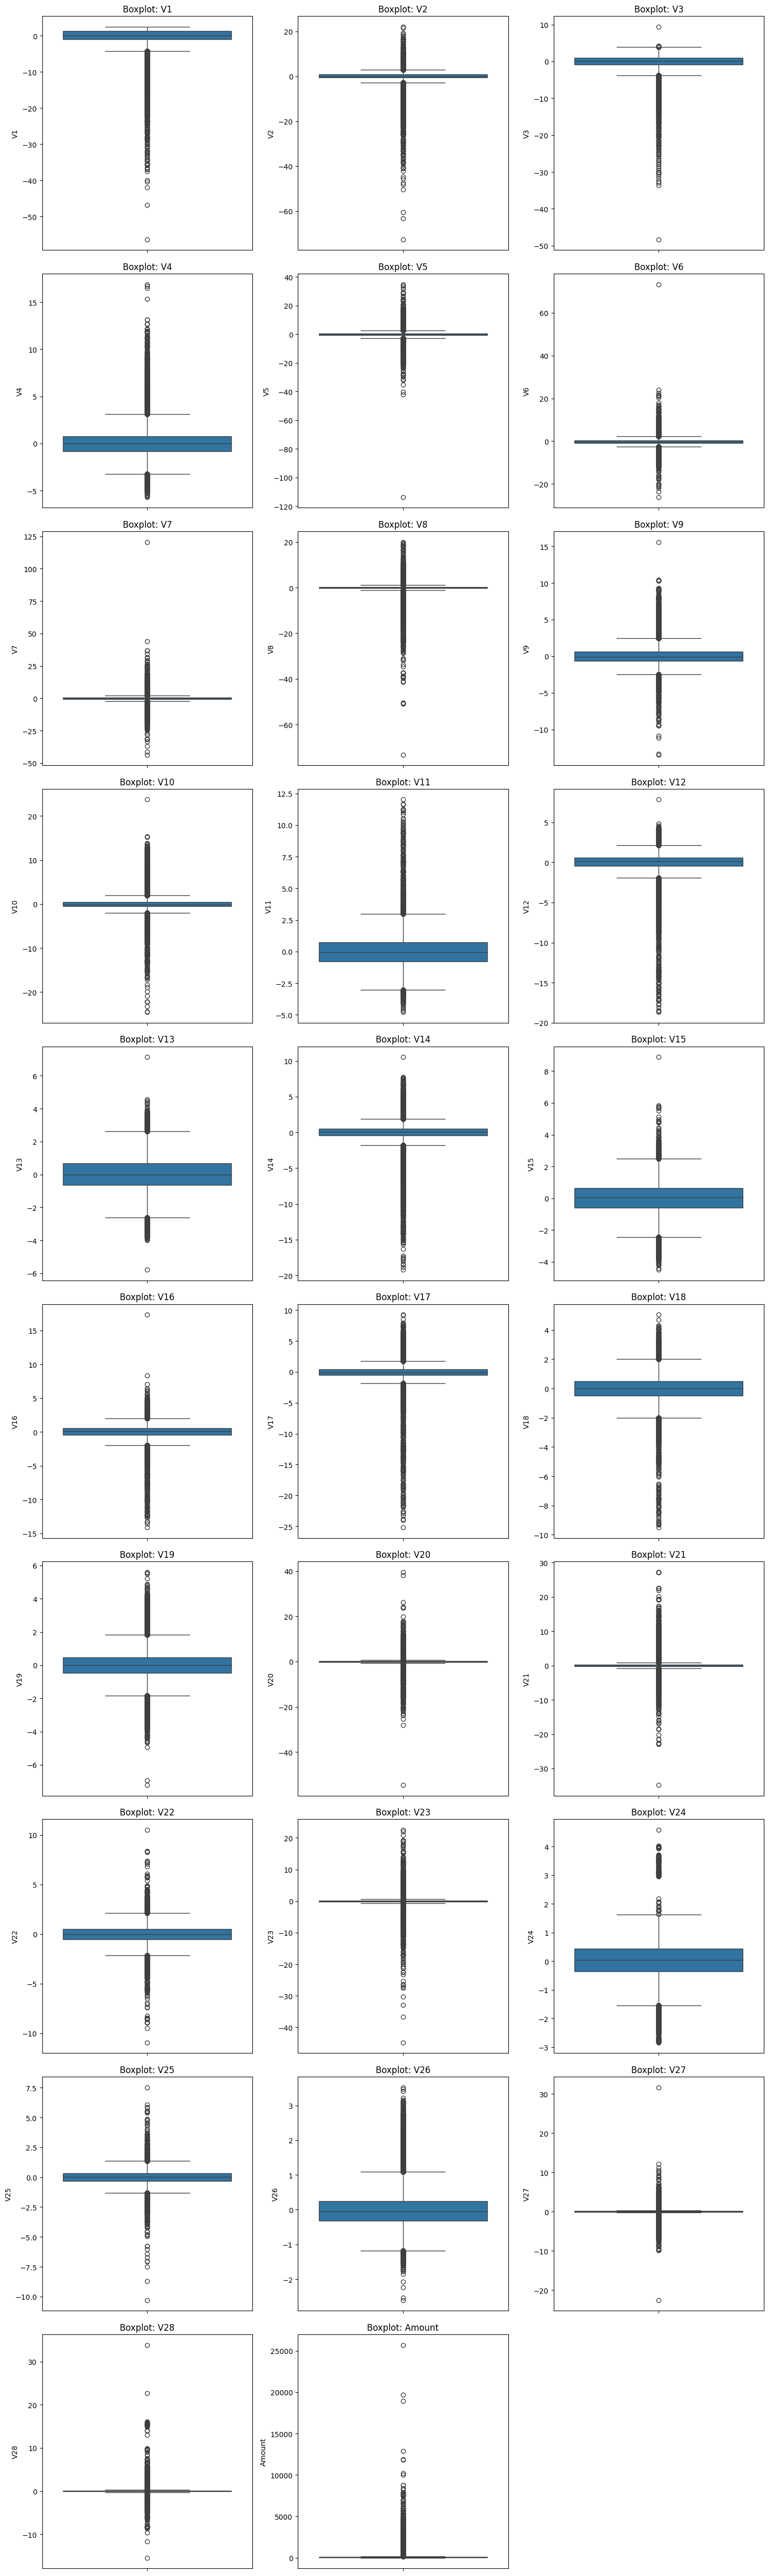

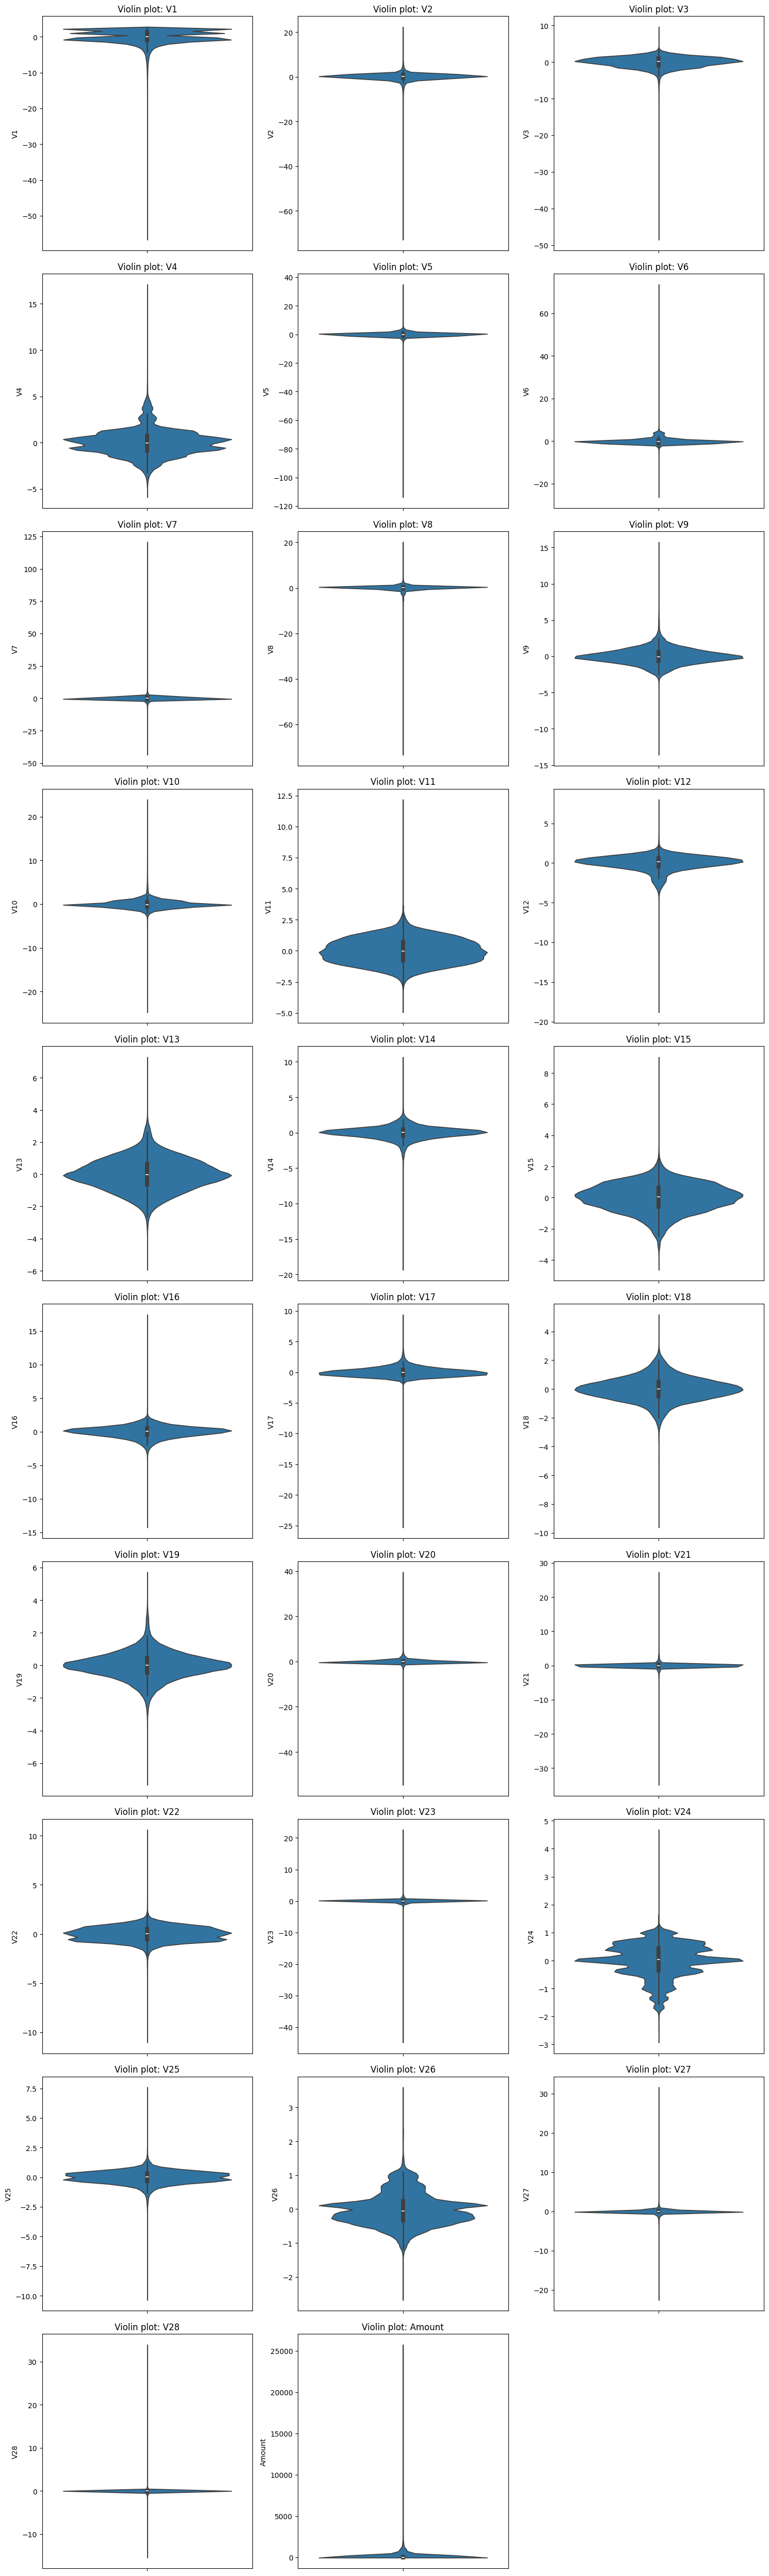

In [ ]:
def plot_numerical_separate_subplots(df, cols):
    """Tworzy oddzielne subploty dla histogramów, boxplotów i wykresów gęstości
       dla zmiennych numerycznych."""

    num_cols = len(cols)
    num_rows = math.ceil(num_cols / 3) 

   
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i + 1)
        sns.histplot(df[col], kde=False, bins=30)
        plt.title(f"Histogram: {col}")
    plt.tight_layout()
    plt.show()

    
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i + 1)
        sns.violinplot(y=df[col])  
        plt.title(f"Violin plot: {col}")  
    plt.tight_layout()
    plt.show()
print("--- Wizualizacje dla zmiennych numerycznych (separate subplots) ---")
plot_numerical_separate_subplots(data, cols)


--- Wizualizacje: Zmienne numeryczne vs. Class ---


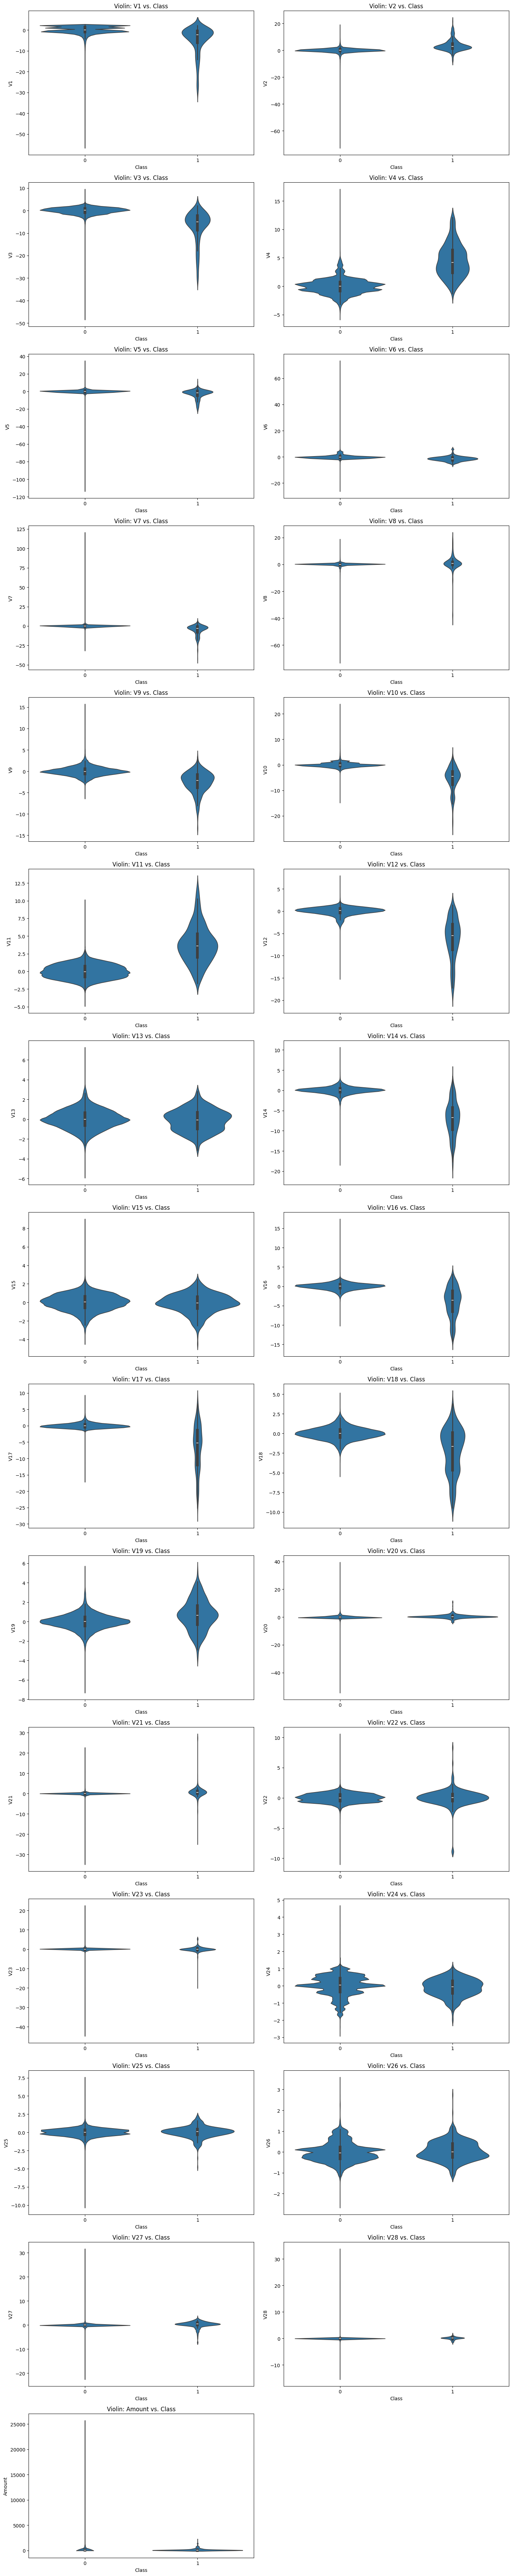

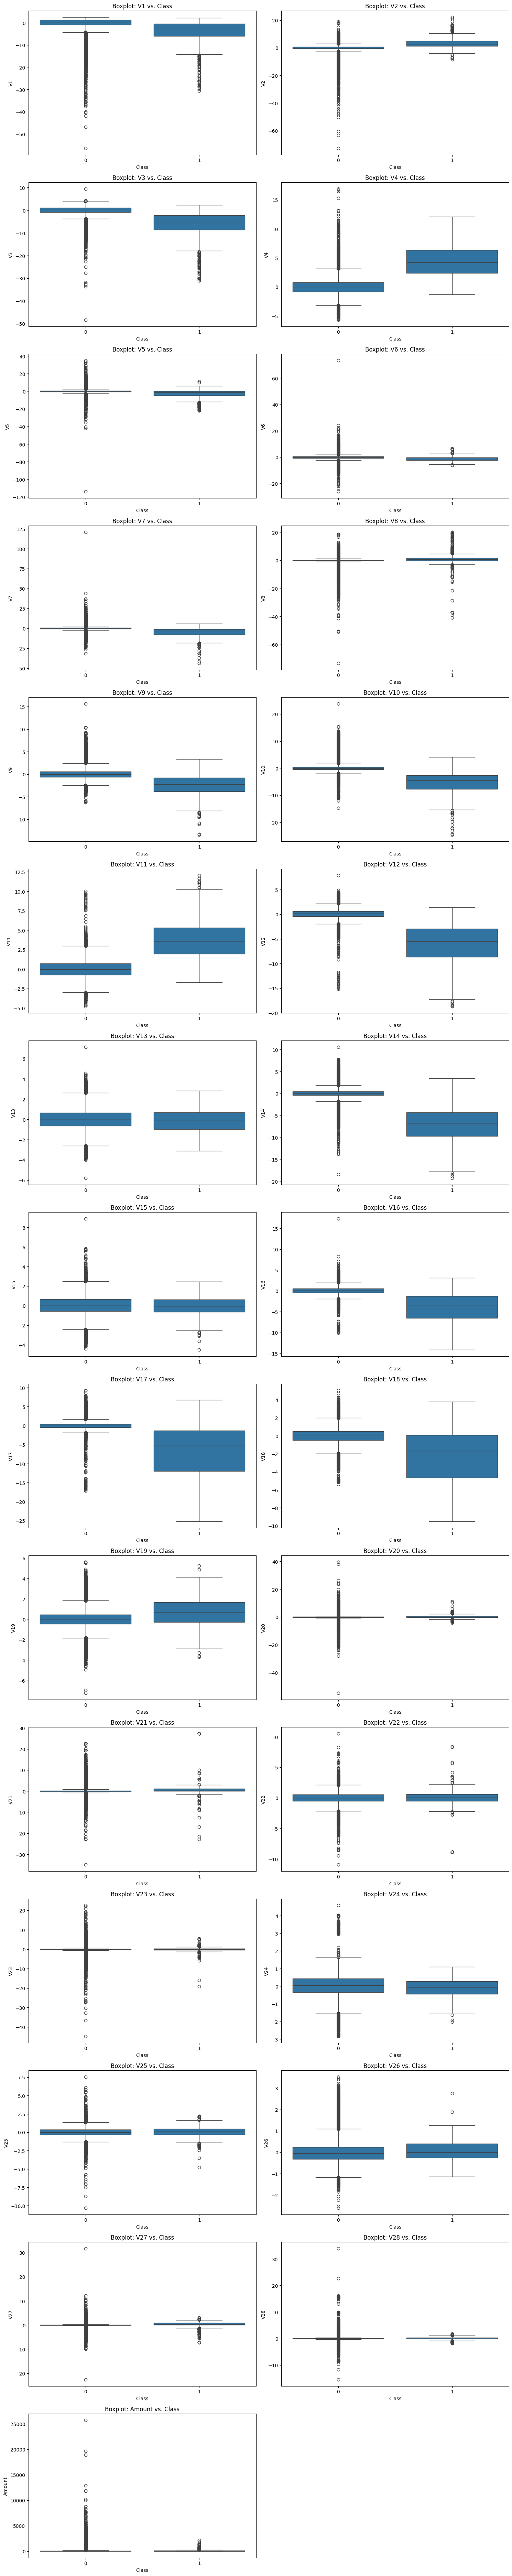

c:\Users\gufer\anaconda3\envs\mlstack\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


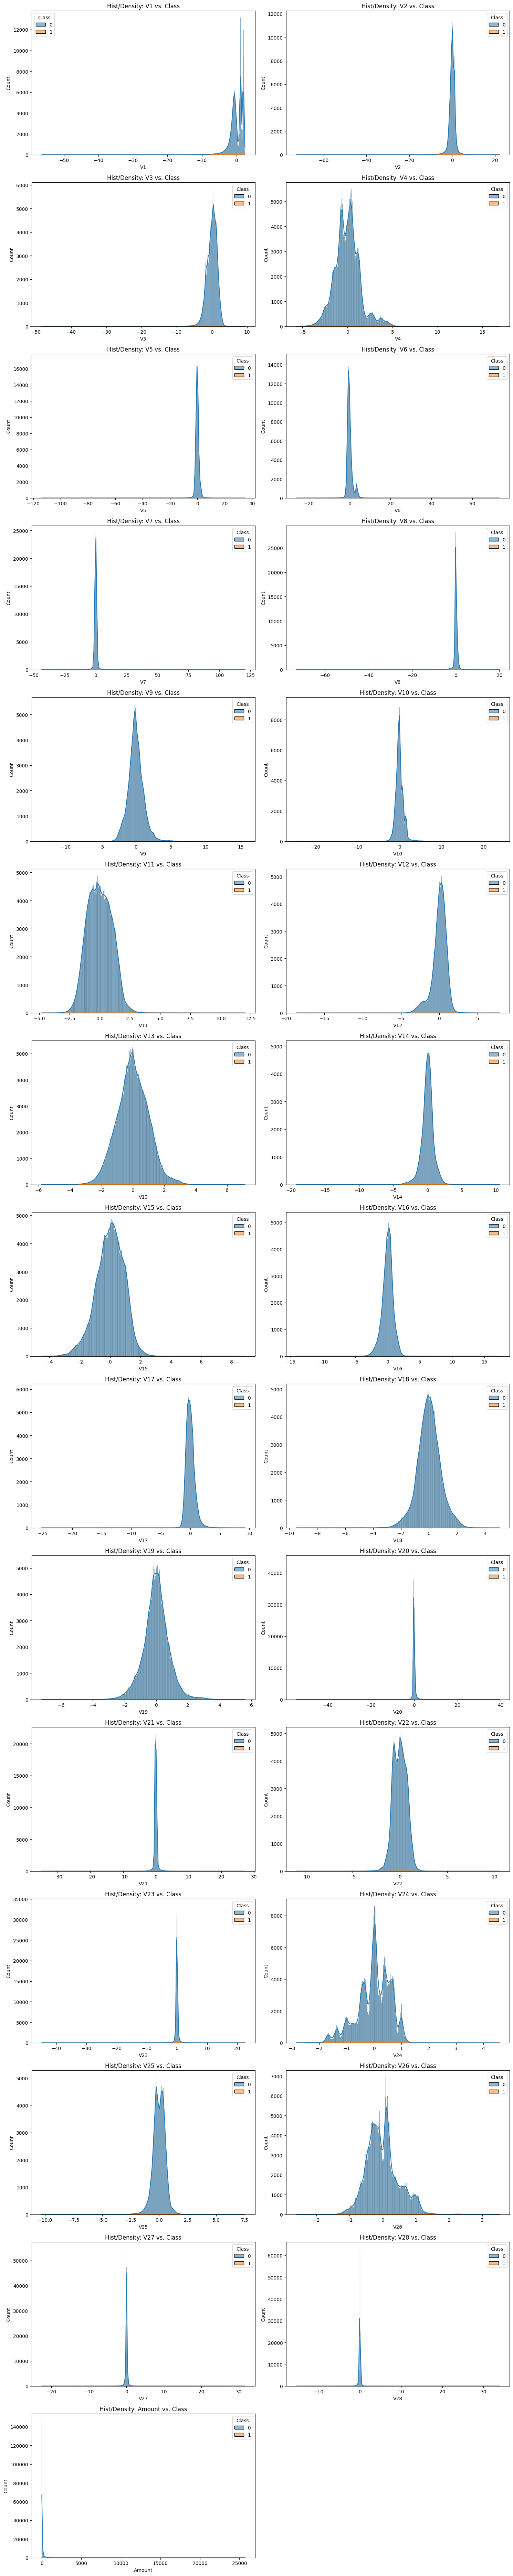

In [ ]:
def plot_numerical_vs_target(df, cols, target_col='Cols'):
    """Tworzy wykresy dla zmiennych numerycznych vs. zmienna celu (binarna)."""

    num_cols = len(cols)
    num_rows = math.ceil(num_cols / 2)  # Maksymalnie 2 wykresy w rzędzie

    # Violin plots
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 2, i + 1)
        sns.violinplot(x=target_col, y=col, data=df)
        plt.title(f'Violin: {col} vs. {target_col}')
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 2, i + 1)
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'Boxplot: {col} vs. {target_col}')
    plt.tight_layout()
    plt.show()

    
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 2, i + 1)
        sns.histplot(data=df, x=col, hue=target_col, kde=True, multiple="layer")
        plt.title(f"Hist/Density: {col} vs. {target_col}")
    plt.tight_layout()
    plt.show()

print("--- Wizualizacje: Zmienne numeryczne vs. Class ---")
plot_numerical_vs_target(data, cols, target_col='Class')



--- Korelacja Pearsona (macierz) ---
            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576

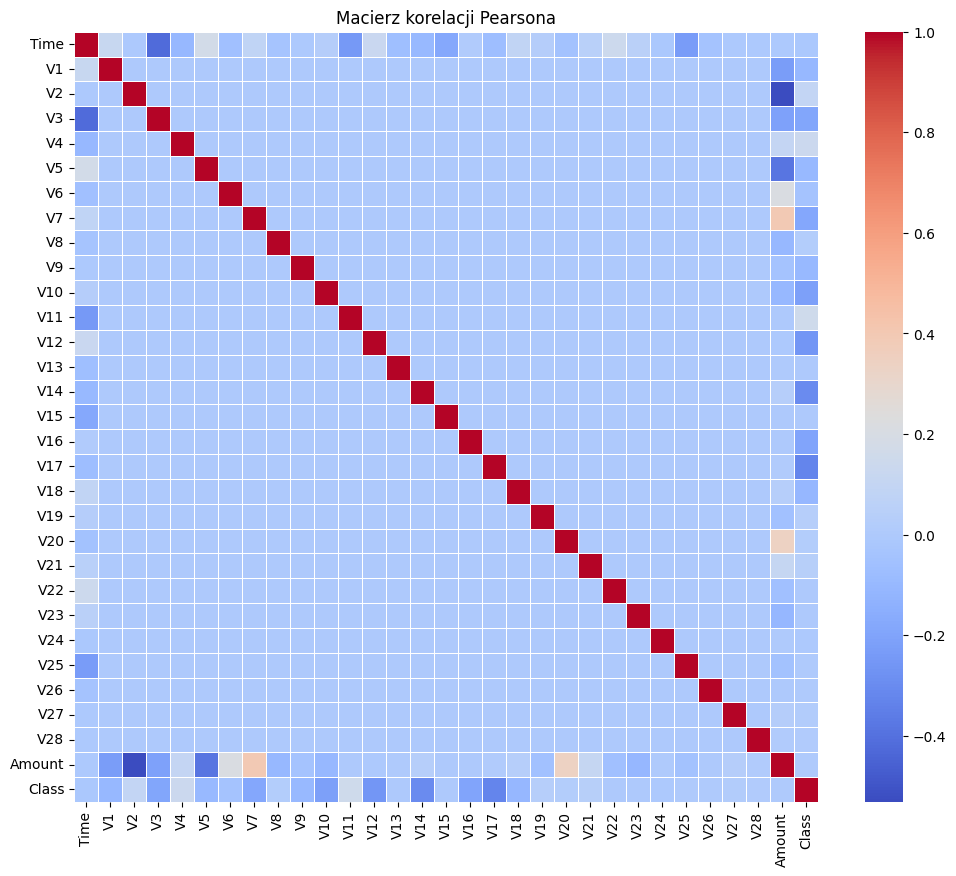


--- Korelacja Spearmana (macierz) ---
            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.190647 -0.006419 -0.473348 -0.142156  0.226004 -0.111408   
V1      0.190647  1.000000 -0.384328 -0.412095  0.101011 -0.106632 -0.086561   
V2     -0.006419 -0.384328  1.000000  0.073967  0.155042  0.342701 -0.110393   
V3     -0.473348 -0.412095  0.073967  1.000000  0.060812 -0.223849  0.171263   
V4     -0.142156  0.101011  0.155042  0.060812  1.000000  0.021367  0.075185   
V5      0.226004 -0.106632  0.342701 -0.223849  0.021367  1.000000 -0.007577   
V6     -0.111408 -0.086561 -0.110393  0.171263  0.075185 -0.007577  1.000000   
V7      0.116722 -0.227650  0.426320 -0.074582  0.059920  0.431573 -0.292680   
V8     -0.103882 -0.236140  0.006980  0.164374 -0.009608 -0.057022  0.444053   
V9      0.017986  0.138614 -0.077880 -0.030876  0.105248 -0.056580  0.028864   
V10     0.014692  0.231636 -0.212437 -0.070960  0.025553 -0.154910  0.063326   
V

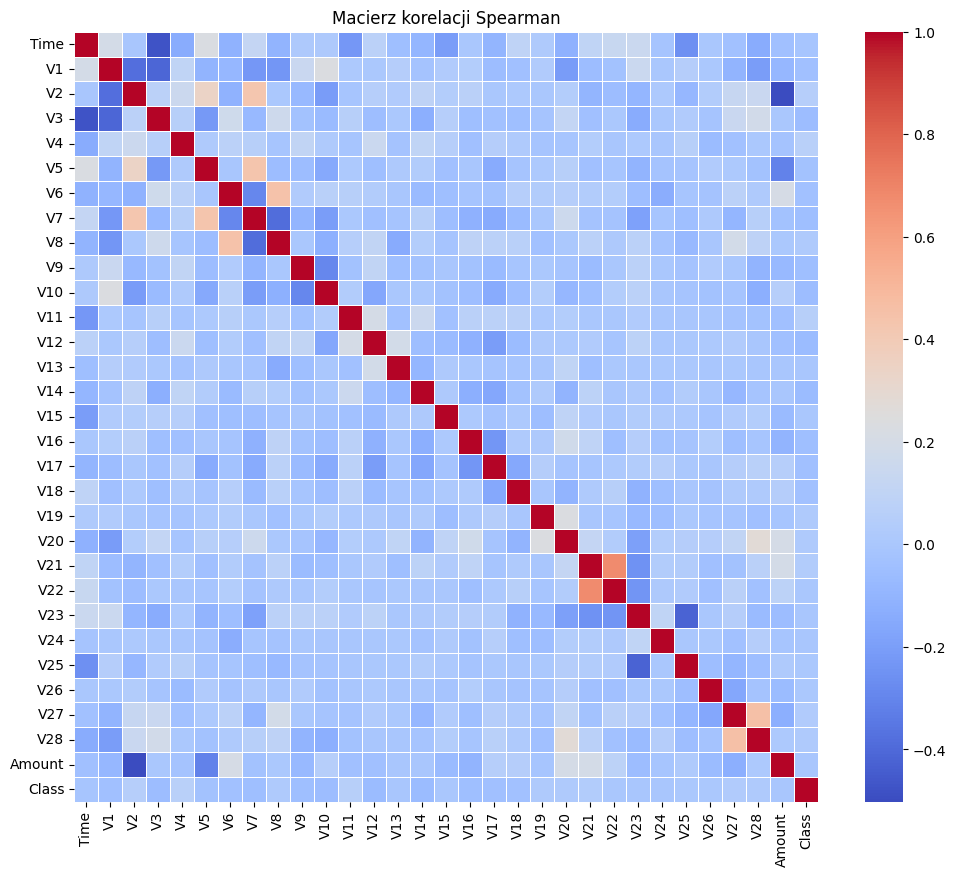


--- Korelacja Kendalla (macierz) ---
            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.127836 -0.004459 -0.317335 -0.095358  0.150390 -0.074251   
V1      0.127836  1.000000 -0.278528 -0.305332  0.061419 -0.070279 -0.062309   
V2     -0.004459 -0.278528  1.000000  0.048478  0.107351  0.253497 -0.075821   
V3     -0.317335 -0.305332  0.048478  1.000000  0.041763 -0.151736  0.121996   
V4     -0.095358  0.061419  0.107351  0.041763  1.000000  0.009641  0.053217   
V5      0.150390 -0.070279  0.253497 -0.151736  0.009641  1.000000 -0.013118   
V6     -0.074251 -0.062309 -0.075821  0.121996  0.053217 -0.013118  1.000000   
V7      0.077968 -0.156327  0.329402 -0.052368  0.036705  0.336956 -0.204163   
V8     -0.068772 -0.173881  0.001017  0.119801 -0.005311 -0.044898  0.346100   
V9      0.011736  0.094833 -0.074310 -0.020508  0.075229 -0.042921  0.018539   
V10     0.009621  0.168545 -0.160066 -0.049982  0.027584 -0.108346  0.043496   
V1

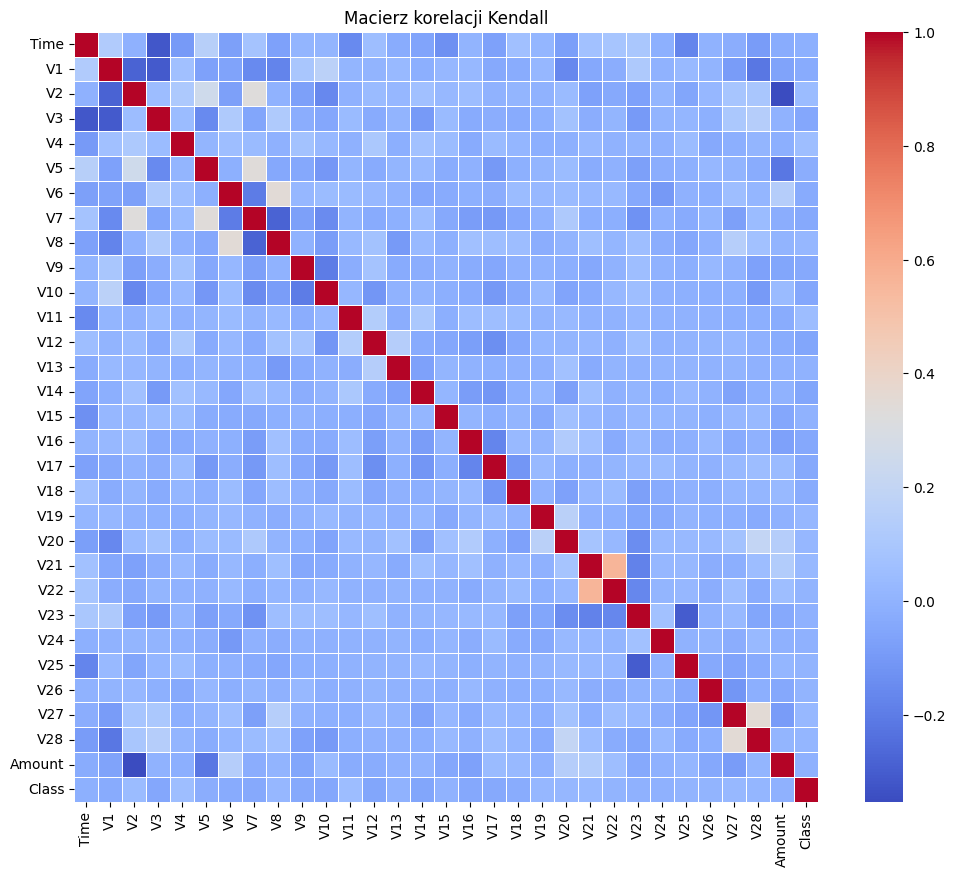


--- Posortowane korelacje Pearsona z Class (wartości bezwzględne) ---
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

--- Posortowane korelacje Spearman z Class (wartości bezwzględne) ---
V14       0.064613
V4        0.063045
V12       0.062870
V11       0.060143
V10       0.059564
V3        0.059278
V2        0.051062
V16       0.049936
V9        0.049499
V7        0.048308
V17       0.044335
V1        0.042424
V6        0.038410
V21       0.0

In [ ]:
def calculate_correlations(df, method='pearson'):
    """Oblicza korelację między wszystkimi parami zmiennych.

    Args:
        df: DataFrame Pandas.
        method: Metoda korelacji ('pearson', 'spearman', 'kendall').

    Returns:
        DataFrame: Macierz korelacji.
    """
    corr_matrix = df.corr(method=method)
    return corr_matrix

def calculate_target_correlation(df, target_col='Class', method='pearson'):
    """Oblicza korelację między zmiennymi a zmienną celu.

    Args:
        df: DataFrame Pandas.
        target_col: Nazwa kolumny zmiennej celu.
        method: Metoda korelacji ('pearson', 'spearman', 'kendall').

    Returns:
        Series: Korelacje ze zmienną celu.
    """
    correlations = df.corr(method=method)[target_col].drop(target_col)  # Usuń korelację zmiennej celu z samą sobą
    return correlations



pearson_corr_matrix = calculate_correlations(data, method='pearson')
pearson_target_corr = calculate_target_correlation(data, target_col='Class', method='pearson')

print("--- Korelacja Pearsona (macierz) ---")
print(pearson_corr_matrix)
print("\n--- Korelacja Pearsona ze zmienną celu (Class) ---")
print(pearson_target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Macierz korelacji Pearsona")
plt.show()

spearman_corr_matrix = calculate_correlations(data, method='spearman')
spearman_target_corr = calculate_target_correlation(data, target_col='Class', method='spearman')

print("\n--- Korelacja Spearmana (macierz) ---")
print(spearman_corr_matrix)
print("\n--- Korelacja Spearmana ze zmienną celu (Class) ---")
print(spearman_target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Macierz korelacji Spearman")
plt.show()


kendall_corr_matrix = calculate_correlations(data, method='kendall')
kendall_target_corr = calculate_target_correlation(data, target_col='Class', method='kendall')

print("\n--- Korelacja Kendalla (macierz) ---")
print(kendall_corr_matrix)
print("\n--- Korelacja Kendalla ze zmienną celu (Class) ---")
print(kendall_target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(kendall_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Macierz korelacji Kendall")
plt.show()


print("\n--- Posortowane korelacje Pearsona z Class (wartości bezwzględne) ---")
print(pearson_target_corr.abs().sort_values(ascending=False))

print("\n--- Posortowane korelacje Spearman z Class (wartości bezwzględne) ---")
print(spearman_target_corr.abs().sort_values(ascending=False))

print("\n--- Posortowane korelacje Kendall z Class (wartości bezwzględne) ---")
print(kendall_target_corr.abs().sort_values(ascending=False))

          T-test Stat  T-test p-value  Mann-Whitney U Stat  \
Variable                                                     
V1          15.629065    5.491643e-45          111193870.0   
V2         -18.761177    1.288580e-59           20289296.0   
V3          21.976004    4.786081e-75          127583455.0   
V4         -35.116449   4.587317e-136            8636598.0   
V5          13.032119    1.497028e-33           99256726.0   
V6          16.706743    5.880378e-50          107291012.0   
V7          17.168755    4.292231e-52          116915822.0   
V8          -1.865139    6.275812e-02           47862020.0   
V9          22.928481    1.193505e-79          118073844.0   
V10         25.755260    3.382884e-93          127861066.0   
V11        -31.519223   4.577212e-120           11458771.0   
V12         29.880026   1.481317e-112          131075998.0   
V13          2.197912    2.842017e-02           73493959.0   
V14         36.201024   1.040151e-140          132771289.0   
V15     

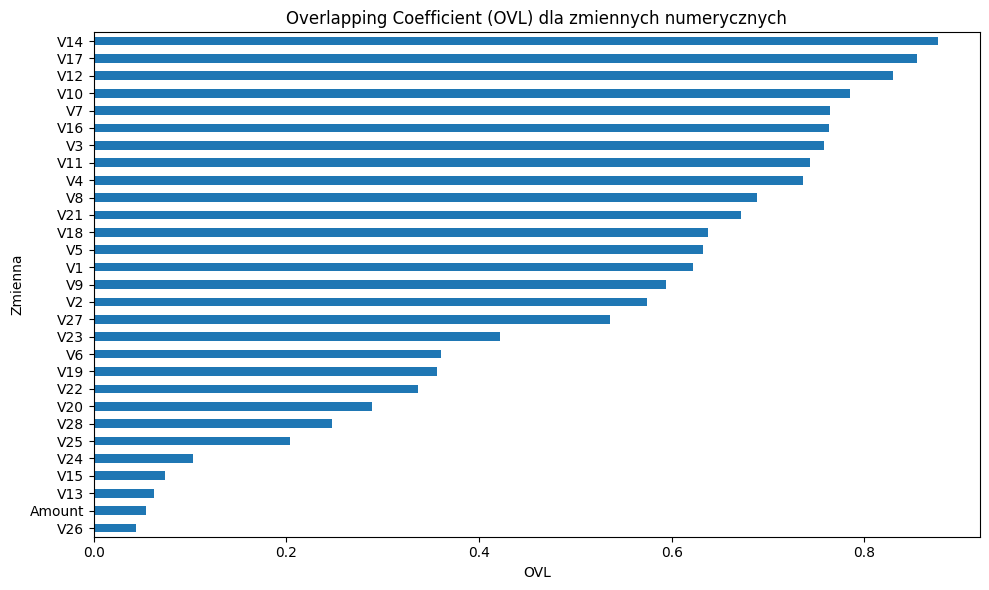

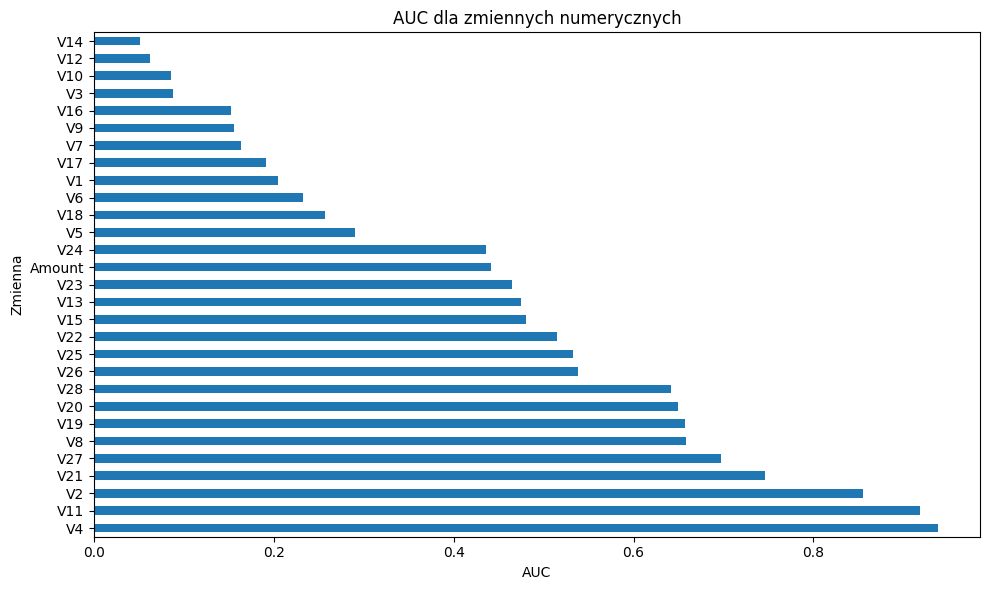

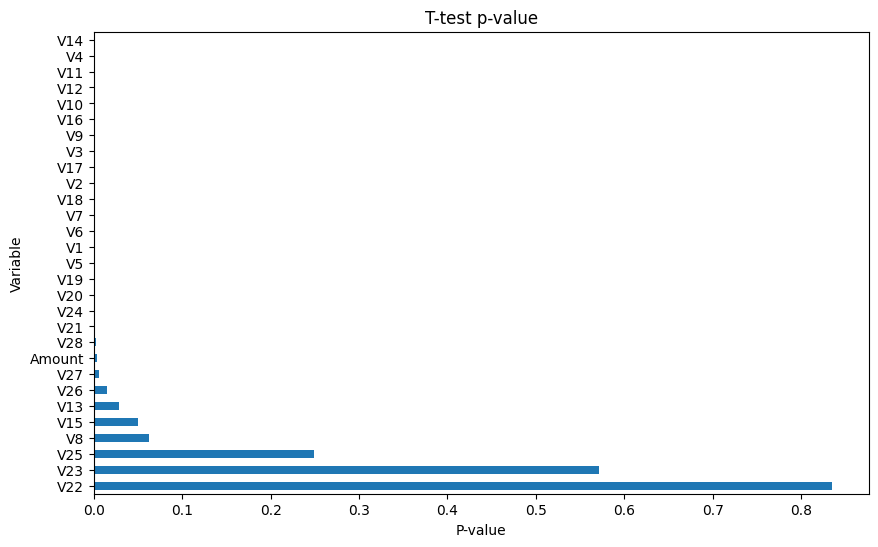

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, norm
from sklearn.metrics import roc_auc_score




def overlapping_coefficient(mean1, std1, mean2, std2):
    """
    Oblicza współczynnik nakładania się dwóch rozkładów normalnych.
    Zakłada rozkłady normalne!
    """
    
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = mean2/(std2**2) - mean1/(std1**2)
    c = mean1**2 /(2*std1**2) - mean2**2 / (2*std2**2) - np.log(std2/std1)

    
    roots = np.roots([a,b,c])

  
    real_roots = roots[np.isreal(roots)].real

    if len(real_roots) == 0:
        return 0.0
    elif len(real_roots) == 1:
        x = real_roots[0]
        ovl = norm.cdf(x, mean1, std1) + (1 - norm.cdf(x, mean2, std2))
        return min(ovl, 1-ovl)
    elif len(real_roots) == 2:
        x1 = min(real_roots)
        x2 = max(real_roots)
        ovl = (norm.cdf(x2, mean1, std1) - norm.cdf(x1, mean1, std1) +
                (1 - norm.cdf(x2, mean2, std2)) - (1 - norm.cdf(x1, mean2, std2)))
        return abs(ovl)
    return 0.0  


def analyze_numerical_discrimination(df, cols, target_col='Class'):
    """
    Analizuje zdolność dyskryminacyjną zmiennych numerycznych.
    """
    results = []
    for col in cols:
        group0 = df[col][df[target_col] == 0].dropna()
        group1 = df[col][df[target_col] == 1].dropna()

        
        if len(group0) < 2 or len(group1) < 2:
            print(f"Pominięto {col}: Niewystarczająca liczba obserwacji w jednej z grup.")
            continue

        t_stat, t_pvalue = ttest_ind(group0, group1, equal_var=False)

        u_stat, u_pvalue = mannwhitneyu(group0, group1, alternative='two-sided')

        mean0, std0 = group0.mean(), group0.std()
        mean1, std1 = group1.mean(), group1.std()

        if std0 < 1e-6 or std1 < 1e-6:
            print(f"Ostrzeżenie: Bardzo małe odchylenie standardowe dla {col}. OVL może być nieprawidłowy.")
            ovl = np.nan
        else:
            ovl = overlapping_coefficient(mean0, std0, mean1, std1)

    
        try:
            auc = roc_auc_score(df[target_col], df[col])
        except ValueError:
            print(f"Błąd AUC dla {col}: Prawdopodobnie tylko jedna klasa w podziale.")
            auc = np.nan

        results.append({
            'Variable': col,
            'T-test Stat': t_stat,
            'T-test p-value': t_pvalue,
            'Mann-Whitney U Stat': u_stat,
            'Mann-Whitney U p-value': u_pvalue,
            'OVL': ovl,
            'AUC': auc
        })

    results_df = pd.DataFrame(results).set_index('Variable')
    return results_df



numerical_discrimination_results = analyze_numerical_discrimination(data, cols)
print(numerical_discrimination_results)



print("\n--- Posortowane według AUC (malejąco) ---")
print(numerical_discrimination_results.sort_values(by='AUC', ascending=False))

plt.figure(figsize=(10, 6))
numerical_discrimination_results['OVL'].sort_values().plot(kind='barh') 
plt.title('Overlapping Coefficient (OVL) dla zmiennych numerycznych')
plt.xlabel('OVL')
plt.ylabel('Zmienna')
plt.tight_layout()
plt.show()

# 3. Wykres słupkowy dla AUC
plt.figure(figsize=(10, 6))
numerical_discrimination_results['AUC'].sort_values(ascending=False).plot(kind='barh')
plt.title('AUC dla zmiennych numerycznych')
plt.xlabel('AUC')
plt.ylabel('Zmienna')
plt.tight_layout()
plt.show()

#4. Wykres dla p-value
plt.figure(figsize=(10,6))
numerical_discrimination_results['T-test p-value'].sort_values(ascending=False).plot(kind='barh')
plt.title("T-test p-value")
plt.xlabel("P-value")
plt.show()

## Selekcja zmiennych 

In [16]:
cols_select = ['V4', 'V11', 'V2', 'V21', 'V27', 'V8', 'V19', 'V20', 'V28', 'V26', 'V25', 'Amount', 'V24', 'V15', 'V13', 'V14', 'V12', 'V10', 'V3', 'V16']
X = data[cols_select]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier




# --- preprocesor ---
def make_preprocessor(cols_select):
    return ColumnTransformer(
        transformers=[('num', RobustScaler(), cols_select)],
        remainder='passthrough'
    )

# --- pipeliny ---
def pipeline_rf(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

def pipeline_xgb(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            random_state=42,
            n_estimators=400
        ))
    ])

def pipeline_cat(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', CatBoostClassifier(
            loss_function='Logloss',
            eval_metric='AUC',
            verbose=0,
            random_state=42
        ))
    ])

# --- siatki hiperparametrów ---
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']
}

# learning_rate ~[0.005 .. 0.2]
lr_space = np.logspace(-2.3, -0.7, 6)

param_grid_xgb = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': lr_space,
    'classifier__subsample': [0.7, 0.85],
    'classifier__cols_selectample_bytree': [0.8, 1.0],
    'classifier__min_child_weight': [1, 2],
    'classifier__gamma': [0.0, 0.5, 1.0]
}

param_grid_cat = {
    'classifier__depth': [4, 6],
    'classifier__learning_rate': [0.03, 0.1],
    'classifier__l2_leaf_reg': [3, 5]
}

# --- ewaluacja ---
def evaluate_model(grid, X_train, y_train, X_test, y_test, model_name):
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n=== {model_name} ===")
    print("Najlepsze parametry (AUC):", grid.best_params_)
    print(f"AUC: {roc_auc:.4f}")
    print(f"Accuracy:   {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# --- uruchomienie gridów ---
results = {}

grid_rf = GridSearchCV(
    estimator=pipeline_rf(cols_select),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
results['Random Forest'] = evaluate_model(grid_rf, X_train, y_train, X_test, y_test, "Random Forest")

grid_xgb = GridSearchCV(
    estimator=pipeline_xgb(cols_select),
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
results['XGBoost'] = evaluate_model(grid_xgb, X_train, y_train, X_test, y_test, "XGBoost")

grid_cat = GridSearchCV(
    estimator=pipeline_cat(cols_select),
    param_grid=param_grid_cat,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
results['CatBoost'] = evaluate_model(grid_cat, X_train, y_train, X_test, y_test, "CatBoost")

print("\n--- Wyniki modeli (po GridSearch, metryka główna: AUC) ---")
print(pd.DataFrame(results).T)



=== Random Forest ===
Najlepsze parametry (AUC): {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
AUC: 0.9748
Accuracy:   0.9969
Precision:  0.3439
Recall:     0.8878
F1-score:   0.4957
Confusion Matrix:
 [[56698   166]
 [   11    87]]


c:\Users\gufer\anaconda3\envs\mlstack\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "cols_selectample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Najlepsze parametry (AUC): {'classifier__cols_selectample_bytree': 0.8, 'classifier__gamma': 0.5, 'classifier__learning_rate': np.float64(0.02187761623949553), 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__subsample': 0.7}
AUC: 0.9719
Accuracy:   0.9995
Precision:  0.9286
Recall:     0.7959
F1-score:   0.8571
Confusion Matrix:
 [[56858     6]
 [   20    78]]

=== CatBoost ===
Najlepsze parametry (AUC): {'classifier__depth': 6, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.03}
AUC: 0.9732
Accuracy:   0.9996
Precision:  0.9419
Recall:     0.8265
F1-score:   0.8804
Confusion Matrix:
 [[56859     5]
 [   17    81]]

--- Wyniki modeli (po GridSearch, metryka główna: AUC) ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.996893   0.343874  0.887755  0.495726  0.974794
XGBoost        0.999544   0.928571  0.795918  0.857143  0.971914
CatBoost       0.999614   0.941860  0.826531  0.880435  0.973152

In [14]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X_2 = data[cols]
y_2 = data['Class']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y
)

In [15]:



grid_rf_2 = GridSearchCV(
    estimator=pipeline_rf(cols),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
grid_xgb_2 = GridSearchCV(
    estimator=pipeline_xgb(cols),
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
grid_cat_2 = GridSearchCV(
    estimator=pipeline_cat(cols),
    param_grid=param_grid_cat,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
results['Random Forest'] = evaluate_model(grid_rf_2, X_train_2, y_train_2, X_test_2, y_test_2, "Random Forest")
results['XGBoost'] = evaluate_model(grid_xgb_2, X_train_2, y_train_2, X_test_2, y_test_2, "XGBoost")
results['CatBoost'] = evaluate_model(grid_cat_2, X_train_2, y_train_2, X_test_2, y_test_2, "CatBoost")


=== Random Forest ===
Najlepsze parametry (AUC): {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
AUC: 0.9788
Accuracy:   0.9966
Precision:  0.3199
Recall:     0.8878
F1-score:   0.4703
Confusion Matrix:
 [[56679   185]
 [   11    87]]

=== XGBoost ===
Najlepsze parametry (AUC): {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.0, 'classifier__learning_rate': np.float64(0.02187761623949553), 'classifier__max_depth': 3, 'classifier__min_child_weight': 2, 'classifier__subsample': 0.85}
AUC: 0.9739
Accuracy:   0.9996
Precision:  0.9405
Recall:     0.8061
F1-score:   0.8681
Confusion Matrix:
 [[56859     5]
 [   19    79]]

=== CatBoost ===
Najlepsze parametry (AUC): {'classifier__depth': 6, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.03}
AUC: 0.9800
Accuracy:   0.9996
Precision:  0.9518
Recall:     0.8061
F1-score:   0.8729
Confusion Matrix:
 [[56860     4]
 [   19    79]]

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import NearestNeighbors
from threadpoolctl import threadpool_limits


X_train = X_train.astype(np.float32)
X_train_2 = X_train_2.astype(np.float32)

knn = NearestNeighbors(n_neighbors=4, algorithm="kd_tree", metric="minkowski")
smote = SMOTE(random_state=42, k_neighbors=knn)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled_2, Y_train_resampled_2 = smote.fit_resample(X_train_2, y_train_2)

    

def make_preprocessor(cols_select):
    return ColumnTransformer(
        transformers=[('num', RobustScaler(), cols_select)],
        remainder='passthrough'
    )


def pipeline_rf(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', RandomForestClassifier(
            class_weight='balanced',
            max_depth=5,
            min_samples_split=2,
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ])

def pipeline_xgb(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            colsample_bytree=0.8,
            gamma=0.5,
            learning_rate=0.02187761623949553,
            max_depth=4,
            min_child_weight=1,
            subsample=0.7,
            n_estimators=400,      
            n_jobs=-1
        ))
    ])

def pipeline_cat(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', CatBoostClassifier(
            loss_function='Logloss',
            eval_metric='AUC',
            depth=6,
            l2_leaf_reg=3,
            learning_rate=0.03,
            iterations=1000,       
            verbose=False,
            random_seed=42
            
        ))
    ])

def evaluate_model(pipeline, X_train, y_train, X_test, y_test, name="Model"):
    pipeline.fit(X_train, y_train)
    y_pred  = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Accuracy:   {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

    return accuracy, precision, recall, f1, roc_auc

results = {}

def print_results(X_train, y_train, X_test, y_test, cols_select):
    results['Random Forest']       = evaluate_model(pipeline_rf(cols_select),  X_train, y_train, X_test, y_test, "Random Forest (best params)")
    results['XGBoost']             = evaluate_model(pipeline_xgb(cols_select), X_train, y_train, X_test, y_test, "XGBoost (best params)")
    results['CatBoost']            = evaluate_model(pipeline_cat(cols_select), X_train, y_train, X_test, y_test, "CatBoost (best params)")

    results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']).T
    print("\n--- Wyniki Modeli ---")
    print(results_df)

print_results(X_train, y_train, X_test, y_test, cols_select)



=== Random Forest (best params) ===
AUC: 0.9748
Accuracy:   0.9969
Precision:  0.3439
Recall:     0.8878
F1-score:   0.4957
Confusion Matrix:
 [[56698   166]
 [   11    87]]

=== XGBoost (best params) ===
AUC: 0.9752
Accuracy:   0.9996
Precision:  0.9302
Recall:     0.8163
F1-score:   0.8696
Confusion Matrix:
 [[56858     6]
 [   18    80]]

=== CatBoost (best params) ===
AUC: 0.9699
Accuracy:   0.9996
Precision:  0.9398
Recall:     0.7959
F1-score:   0.8619
Confusion Matrix:
 [[56859     5]
 [   20    78]]

--- Wyniki Modeli ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.996893   0.343874  0.887755  0.495726  0.974794
XGBoost        0.999579   0.930233  0.816327  0.869565  0.975224
CatBoost       0.999561   0.939759  0.795918  0.861878  0.969900


In [ ]:
print_results(X_train, y_train, X_test, y_test, cols_select)


In [18]:
def make_preprocessor(cols_select):
    return ColumnTransformer(
        transformers=[('num', RobustScaler(), cols_select)],
        remainder='passthrough'
    )


def pipeline_rf(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', RandomForestClassifier(
            class_weight='balanced',
            max_depth=5,
            min_samples_split=2,
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ])

def pipeline_xgb(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            colsample_bytree=0.8,
            gamma=0.0,
            learning_rate=0.04570881896148752,
            max_depth=3,
            min_child_weight=2,
            subsample=0.85,
            n_estimators=400,      
            random_state=42,
            n_jobs=-1
        ))
    ])

def pipeline_cat(cols_select):
    return Pipeline(steps=[
        ('preprocessor', make_preprocessor(cols_select)),
        ('classifier', CatBoostClassifier(
            loss_function='Logloss',
            eval_metric='AUC',
            depth=4,
            l2_leaf_reg=3,
            learning_rate=0.03,
            iterations=1000,       
            verbose=False,
            random_seed=42
            
        ))
    ])

def evaluate_model(pipeline, X_train_resampled, Y_train_resampled, X_test, y_test, name="Model"):
    pipeline.fit(X_train_resampled, Y_train_resampled)
    y_pred  = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Accuracy:   {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

    return accuracy, precision, recall, f1, roc_auc

results = {}

def print_results(X_train_resampled, Y_train_resampled, X_test, y_test, cols_select):
    results['Random Forest']       = evaluate_model(pipeline_rf(cols_select),  X_train_resampled, Y_train_resampled, X_test, y_test, "Random Forest (best params)")
    results['XGBoost']             = evaluate_model(pipeline_xgb(cols_select), X_train_resampled, Y_train_resampled, X_test, y_test, "XGBoost (best params)")
    results['CatBoost']            = evaluate_model(pipeline_cat(cols_select), X_train_resampled, Y_train_resampled, X_test, y_test, "CatBoost (best params)")

    results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']).T
    print("\n--- Wyniki Modeli ---")
    print(results_df)

print_results(X_train_resampled, Y_train_resampled, X_test, y_test, cols_select)


=== Random Forest (best params) ===
AUC: 0.9764
Accuracy:   0.9942
Precision:  0.2143
Recall:     0.8878
F1-score:   0.3452
Confusion Matrix:
 [[56545   319]
 [   11    87]]

=== XGBoost (best params) ===
AUC: 0.9720
Accuracy:   0.9907
Precision:  0.1447
Recall:     0.8980
F1-score:   0.2493
Confusion Matrix:
 [[56344   520]
 [   10    88]]

=== CatBoost (best params) ===
AUC: 0.9734
Accuracy:   0.9968
Precision:  0.3359
Recall:     0.8776
F1-score:   0.4859
Confusion Matrix:
 [[56694   170]
 [   12    86]]

--- Wyniki Modeli ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.994207   0.214286  0.887755  0.345238  0.976432
XGBoost        0.990696   0.144737  0.897959  0.249292  0.971998
CatBoost       0.996805   0.335938  0.877551  0.485876  0.973397


In [19]:
print_results(X_train_resampled_2, Y_train_resampled_2, X_test_2, y_test_2, cols)


=== Random Forest (best params) ===
AUC: 0.9764
Accuracy:   0.9939
Precision:  0.2047
Recall:     0.8878
F1-score:   0.3327
Confusion Matrix:
 [[56526   338]
 [   11    87]]

=== XGBoost (best params) ===
AUC: 0.9814
Accuracy:   0.9936
Precision:  0.1982
Recall:     0.8980
F1-score:   0.3247
Confusion Matrix:
 [[56508   356]
 [   10    88]]

=== CatBoost (best params) ===
AUC: 0.9787
Accuracy:   0.9975
Precision:  0.4009
Recall:     0.8878
F1-score:   0.5524
Confusion Matrix:
 [[56734   130]
 [   11    87]]

--- Wyniki Modeli ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.993873   0.204706  0.887755  0.332696  0.976385
XGBoost        0.993575   0.198198  0.897959  0.324723  0.981391
CatBoost       0.997525   0.400922  0.887755  0.552381  0.978679


In [20]:
print_results(X_train, y_train, X_test, y_test, cols_select)


=== Random Forest (best params) ===
AUC: 0.9748
Accuracy:   0.9969
Precision:  0.3439
Recall:     0.8878
F1-score:   0.4957
Confusion Matrix:
 [[56698   166]
 [   11    87]]

=== XGBoost (best params) ===
AUC: 0.9728
Accuracy:   0.9996
Precision:  0.9524
Recall:     0.8163
F1-score:   0.8791
Confusion Matrix:
 [[56860     4]
 [   18    80]]

=== CatBoost (best params) ===
AUC: 0.9699
Accuracy:   0.9996
Precision:  0.9398
Recall:     0.7959
F1-score:   0.8619
Confusion Matrix:
 [[56859     5]
 [   20    78]]

--- Wyniki Modeli ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.996893   0.343874  0.887755  0.495726  0.974794
XGBoost        0.999614   0.952381  0.816327  0.879121  0.972847
CatBoost       0.999561   0.939759  0.795918  0.861878  0.969900


In [21]:
print_results(X_train_2, y_train_2, X_test_2, y_test_2, cols)


=== Random Forest (best params) ===
AUC: 0.9788
Accuracy:   0.9966
Precision:  0.3199
Recall:     0.8878
F1-score:   0.4703
Confusion Matrix:
 [[56679   185]
 [   11    87]]

=== XGBoost (best params) ===
AUC: 0.9738
Accuracy:   0.9995
Precision:  0.9286
Recall:     0.7959
F1-score:   0.8571
Confusion Matrix:
 [[56858     6]
 [   20    78]]

=== CatBoost (best params) ===
AUC: 0.9767
Accuracy:   0.9996
Precision:  0.9419
Recall:     0.8265
F1-score:   0.8804
Confusion Matrix:
 [[56859     5]
 [   17    81]]

--- Wyniki Modeli ---
               Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest  0.996559   0.319853  0.887755  0.470270  0.978799
XGBoost        0.999544   0.928571  0.795918  0.857143  0.973771
CatBoost       0.999614   0.941860  0.826531  0.880435  0.976659


# Najepszym modelem ostatecznie okazał się XGBoost na pełnym zestawie danych czy X_train 2 i ze SMOTE zwiększeniem klasy mniejszościowej - Kryterium wyboru jest AUC pokazujący jak dobrze model potrafi dyskryminować między klasami a tutaj osiągnął bardzo wysoki poziom 0,9814 
# Biorąc pod uwagę inne metryki najlepszym modelem może być również CatBoost z pełnym zestawem danych bez SMOTe ma wysoka precyzje 0,9419 i czułość 0,8265. Natomiast według macierzy pomyłek przepuścił 17 fraudów w porównaniu do 10 modelu opisanego wyżej. Natomiast lepiej klasyfikował prawidłowe transakcje gdzie pomylił się jedynie 5 razy w porównaniu do modelu wyżej który pomylił się 356 razy